# Assignement Module 4

## Sofia Davoli
### 813479


In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import math

### Plot the average anomaly map for the [psl] variable, between the periods 1950-2000 and 1900-1950.
### Model MRI-ESM2-0

In [3]:
#Read file
model = 'MRI-ESM2-0'
print('\n **** NOW ARRANGE SLP *** \n')

#- Path to file
modfile0=''.join(['./psl_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])
ds0 = xr.open_dataset(modfile0)

#- extract variable (psl)
psl0 = ds0.psl
print(ds0)


 **** NOW ARRANGE SLP *** 

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 160, lon: 320, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:32:52Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            psl
    variant_label:          r1i1p1f1
    license

In [27]:
#extract and calculate average over te 22 different time period

psl_1950=psl0.sel(time=slice('1900','1950')).mean('time')
psl_2000=psl0.sel(time=slice('1951','2000')).mean('time')

In [37]:
psl_anom=psl_1950-psl_2000
psl_anom

<xarray.DataArray 'psl' (lat: 160, lon: 320)>
array([[-15.9765625, -15.8984375, -15.8515625, ..., -15.7734375,
        -15.7734375, -15.828125 ],
       [-12.9375   , -12.8984375, -13.015625 , ..., -13.015625 ,
        -12.9453125, -12.9609375],
       [-10.4765625, -10.2421875, -10.171875 , ..., -10.7890625,
        -10.6015625, -10.5703125],
       ...,
       [ 32.90625  ,  32.671875 ,  32.484375 , ...,  33.898438 ,
         33.554688 ,  33.226562 ],
       [ 33.320312 ,  33.054688 ,  32.898438 , ...,  33.851562 ,
         33.710938 ,  33.523438 ],
       [ 35.289062 ,  35.148438 ,  35.03125  , ...,  35.5      ,
         35.351562 ,  35.273438 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9

Text(0.5, 1.0, 'Average MRI-ESM2-0 model anomaly map\n between 1900-1950 and 1950-2000')

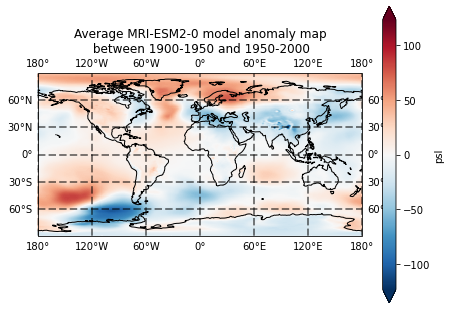

In [39]:
#- make some visual checks of what's going on
fig = plt.figure(figsize=(16,12))
subplots = (2,2)
n_panels = subplots[0] * subplots[1]

#- check: location before lon adjustment
ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.set_global()
ax.coastlines() 
psl_anom.plot(extend='both')
plt.title('Average MRI-ESM2-0 model anomaly map\n between 1900-1950 and 1950-2000')